In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2
from sklearn.model_selection import train_test_split
from dataloaders.patient_dataset import PatientDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Filips file path
#images_path = "/home/filiptkac/Downloads/abd-trauma-dataset-reduced"
#labels_path = "/home/filiptkac/Downloads/train_reduced.csv"

# michelles files path
images_path = r"C:\Users\miche\Downloads\dataset_reduced\abd-trauma-dataset-reduced"
labels_path = r"C:\Users\miche\Downloads\dataset_reduced\train_reduced.csv"

df = pd.read_csv(labels_path)
#print(df)


      Unnamed: 0  patient_id  bowel_healthy  bowel_injury  \
0              0       10004              1             0   
1              1       10005              1             0   
2              2       10007              1             0   
3              3       10026              1             0   
4              4       10051              1             0   
...          ...         ...            ...           ...   
2881        3142        9951              1             0   
2882        3143        9960              1             0   
2883        3144        9961              1             0   
2884        3145        9980              1             0   
2885        3146        9983              1             0   

      extravasation_healthy  extravasation_injury  kidney_healthy  kidney_low  \
0                         0                     1               0           1   
1                         1                     0               1           0   
2                       

torch.Size([100, 128, 128])
torch.Size([100, 128, 128])
torch.Size([128, 128, 100, 1]) shape
15
2886
torch.Size([128, 128, 100, 1])
[0 1 0 0 1 0 1 0 1 0 0 0 0 1 1]


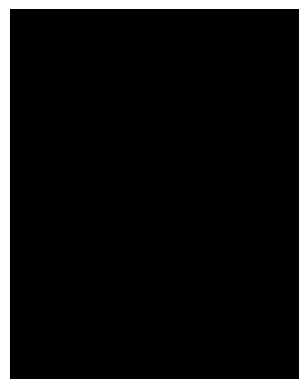

In [51]:
dataset = PatientDataset(images_path, df)
images, labels = dataset[1]
print(len(labels))
print(len(dataset))
print(images.shape)
print(labels)

sample_image = images[0].squeeze().numpy()
plt.imshow(sample_image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Filips file path
#images_path = "/home/filiptkac/Downloads/abd-trauma-dataset-reduced"
#labels_path = "/home/filiptkac/Downloads/train_reduced.csv"

# michelles files path
images_path = r"C:\Users\miche\Downloads\dataset_reduced\abd-trauma-dataset-reduced"
labels_path = r"C:\Users\miche\Downloads\dataset_reduced\train_reduced.csv"

df = pd.read_csv(labels_path)


# Create an empty list to store file paths
file_paths = []

# Iterate over files in images_path directory
for filename in os.listdir(images_path):
    file_path = os.path.join(images_path, filename)
    # Append the file path to the list
    file_paths.append(file_path)

# Add a new column 'file_path' to the DataFrame
df['file_path'] = file_paths



# Split the dataset into train, validation, and test sets
train_data, val_test_data = train_test_split(df, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)

# check it has correct procentage
print(len(train_data)) #80%
print(len(val_data)) #10%
print(len(test_data)) #10%

print('train:', len(train_data)/len(df)*100,'%')
print('val:', len(val_data)/len(df)*100,'%')
print('test:', len(test_data)/len(df)*100,'%')

# drop file name in train, val, test df
train_data = train_data.drop(columns=['file_path'])
train_data = val_data.drop(columns=['file_path'])
train_data = test_data.drop(columns=['file_path'])



2308
289
289
train: 79.97227997227996 %
val: 10.013860013860015 %
test: 10.013860013860015 %


In [ ]:
# create preprocced train-, validation-, test- datasets
train_dataset = PatientDataset(images_path, train_data)
val_dataset = PatientDataset(images_path, val_data)
test_dataset = PatientDataset(images_path, test_data)


# create dataloaders for each dataset
batch_size = 32 

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # shuffle = true, avoid any bias introduced by the order of the data.
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




 #Iterate over a few batches of data from train_loader 

for batch_number, batch in enumerate(train_dataloader):
    print("---")
    print("Batch number: ", batch_number)
    inputs, labels = batch  # Corrected: Change outputs to labels
    print("Inputs shape:", inputs.shape)
    print("Labels shape:", labels.shape)  # Corrected: Change outputs to labels





---
Batch number:  0
Inputs shape: torch.Size([32, 100, 128, 128])
tensor([[2816,    1,    0,    1,    0,    1,    0,    0,    1,    0,    0,    1,
            0,    0,    0],
        [1033,    1,    0,    1,    0,    1,    0,    0,    0,    1,    0,    1,
            0,    0,    1],
        [2221,    1,    0,    1,    0,    1,    0,    0,    1,    0,    0,    1,
            0,    0,    0],
        [ 591,    1,    0,    1,    0,    1,    0,    0,    0,    1,    0,    1,
            0,    0,    1],
        [ 860,    1,    0,    1,    0,    1,    0,    0,    1,    0,    0,    1,
            0,    0,    0],
        [1624,    1,    0,    1,    0,    1,    0,    0,    1,    0,    0,    1,
            0,    0,    0],
        [1373,    1,    0,    1,    0,    1,    0,    0,    1,    0,    0,    1,
            0,    0,    0],
        [2658,    1,    0,    1,    0,    1,    0,    0,    1,    0,    0,    1,
            0,    0,    0],
        [3107,    1,    0,    1,    0,    1,    0,    0,    1

KeyboardInterrupt: 

In [ ]:
# create CNN Model